In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import os

mystr = "/srv/data/ref_concat.fasta"
dir_path = os.path.dirname(os.path.realpath(mystr))
dir_path + "/seg_files.txt"

'/srv/data/seg_files.txt'

In [32]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

c_darkblue = "#4c6c9c"
c_darkgreen = "#5e8f7b"
c_purple = "#947db0"

In [4]:
def bin_count_stats(df):
    print("min count\t" + str(np.min(df["count"])) + "\tbin\t" + str(df[df["count"] == np.min(df["count"])]["bin"].values[0]))
    print("max count\t" + str(np.max(df["count"])) + "\tbin\t" + str(df[df["count"] == np.max(df["count"])]["bin"].values[0]))
    print("mean count\t" + str(np.mean(df["count"])))
    print("stdev\t" + str(np.std(df["count"])))

In [47]:
def plot_bin_counts(filename):
    df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
    df["bin"] = np.arange(len(df["count"]))
    plt.figure(figsize=(8, 5))
    plt.bar(df["bin"], df["count"])
    plt.xlabel("Genome segment")
    plt.ylabel("Distinct minimiser count")
    plt.title("Distinct minimiser count across " + filename)
    bin_count_stats(df)

def plot_bin_entropy(filename, outfile, titlename):
    df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
    df["bin"] = np.arange(len(df["count"]))
    plt.figure(figsize=(8, 5))
    color_list = []
    df["norm-count"] = df["count"] / df["seg-len"]
    mean_count = np.mean(df["norm-count"])

    
    high_entropy = mpatches.Patch(color='#32a664', label='high entropy')
    low_entropy = mpatches.Patch(color='#427fdb', label='low entropy')

    
    df['color'] = df['norm-count'].apply(lambda x: "#32a664" if x > mean_count else "#427fdb") 
    plt.bar(df["bin"], df["norm-count"], width=0.9, color = df["color"])
    plt.xlabel("Genome segment")
    plt.ylabel("Norm. distinct minimiser count")
    plt.title("Sequence entropy across the " + titlename)
    plt.legend(handles=[high_entropy, low_entropy])
    plt.tight_layout()
    plt.savefig(outfile, dpi = 200)
    bin_count_stats(df)

In [48]:
filename = "mouse.k17.header"
df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
df["bin"] = np.arange(len(df["count"]))
no_matches = df[(df["bin"] >= 989) & (df["bin"] <= 1022)]

In [49]:
np.mean(no_matches["count"] / no_matches["seg-len"])

0.3247826222959495

## Are segments of equal length?

No

In [50]:
filename = "human.header"
df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
np.std(df["seg-len"])

526158.6558032142

Is normalization necessary?

In [51]:
df["entropy"] = df["count"] / df["seg-len"]
round(df["count"].corr(df["entropy"]), 3)

0.889

Yes, to describe 11% of the variation

## Plot entropy across the genome

The number of distinct minimisers is a proxy for the entropy

min count	7	bin	664
max count	409641	bin	708
mean count	41383.205078125
stdev	39551.69793236369


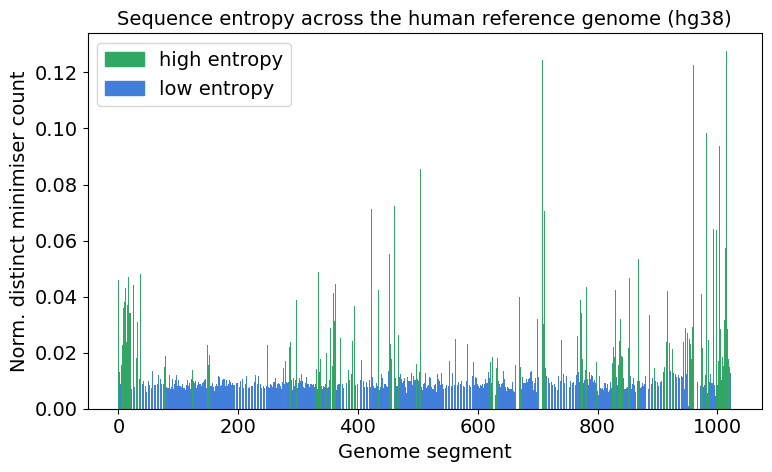

In [53]:
# TODO: the variation at the beginning is an artefact from dna5 to dna4 conversion
plot_bin_entropy("human.header", "human.21.entropy.png", "human reference genome (hg38)")

min count	159848	bin	265
max count	1309499	bin	940
mean count	1101229.533203125
stdev	184364.96650208073


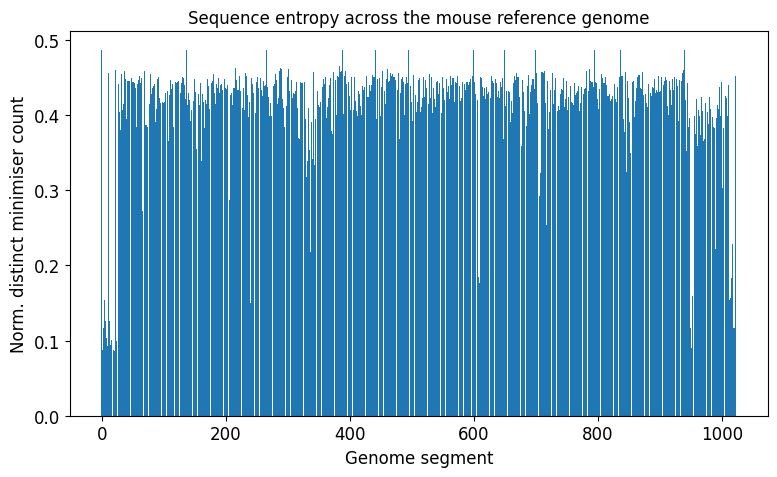

In [93]:
plot_bin_entropy("mouse.k17.header", "mouse.k17.entropy.png", "mouse reference genome")

min count	3504	bin	38
max count	186966	bin	1
mean count	43702.84375
stdev	57842.58461797922


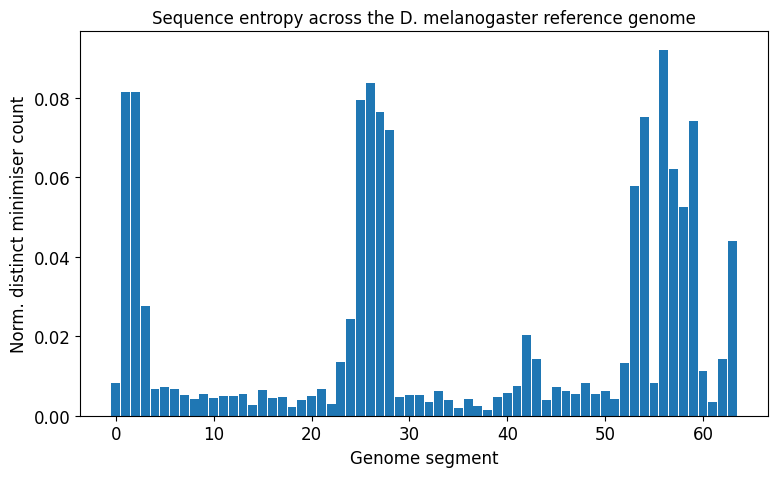

In [94]:
plot_bin_entropy("fly.header", "fly.entropy.png", "D. melanogaster reference genome")